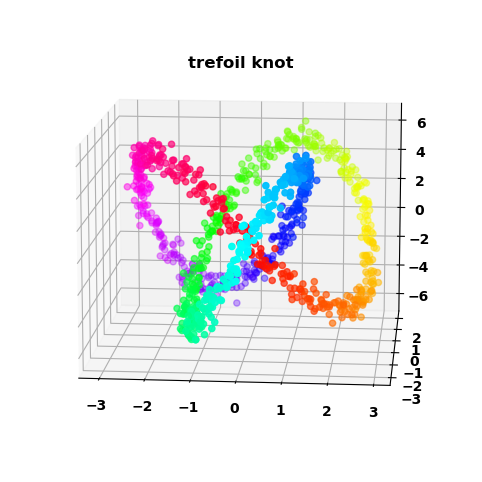

In [2]:
#works on pandas 1.5.3, numpy 1.24.3, matplotlib 3.6.2 and sci-kit learn 1.2.2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.decomposition import PCA

def trefoil_knot(t):
    x = np.sin(t) + 2 * np.sin(2 * t) + 0.1 * np.random.randn(1000)
    y = np.cos(t) - 2 * np.cos(2 * t) + 0.1 * np.random.randn(1000)
    z = 5 * (-np.sin(3 * t) + 0.1 * np.random.randn(1000))
    return x, y, z

t = np.linspace(0, 2 * np.pi, 1000)
x, y, z = trefoil_knot(t)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x,y,z, c = t, cmap = 'hsv')
ax.view_init(azim=-85, elev=12)
ax.set_title("trefoil knot", y = 0.93)
plt.show()

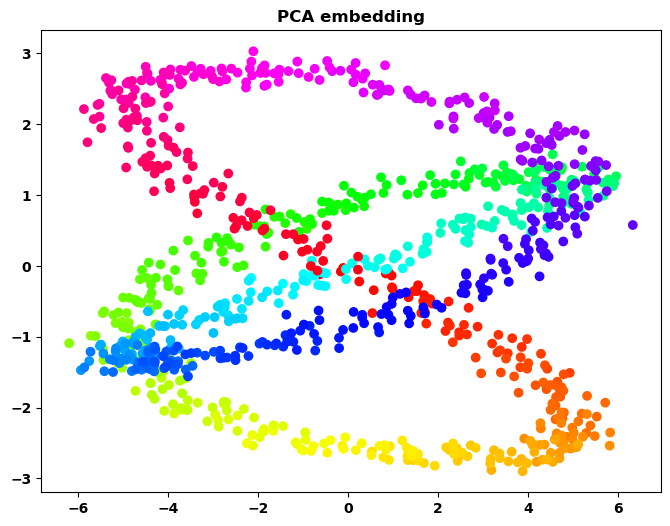

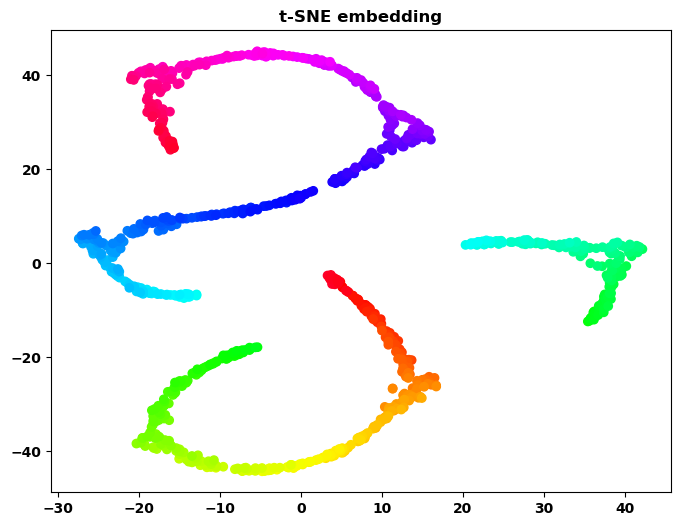

In [5]:
X = pd.DataFrame(data= {"x":x.ravel(),"y":y.ravel(),"z":z.ravel()})

# PCA on 2-dimensions
pca = PCA(n_components=2, random_state=42)
pca.fit(X)
pca_X = pca.fit_transform(X)

fig = plt.figure(figsize=(8, 6))
plt.scatter(pca_X[:,0], pca_X[:,1], c=t, cmap = "hsv")
plt.title('PCA embedding')
plt.show()

# t-SNE on 2-dimensions
tsne = manifold.TSNE(n_components=2, perplexity=25, random_state=42, init='random', learning_rate=200)
tsne.fit(X)
tsne_X = tsne.fit_transform(X)
fig = plt.figure(figsize=(8, 6))
plt.scatter(tsne_X[:,0], tsne_X[:,1], c=t, cmap = "hsv")
plt.title('t-SNE embedding')
plt.show()